In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [2]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}

df_spam = pd.DataFrame(data_spam)
df_spam


,Słowo_1,Słowo_2,Wykrzyknik,Spam
0,darmowy,wygrana,TAK,TAK
1,darmowy,wygrana,TAK,TAK
2,spotkanie,jutro,NIE,NIE
3,raport,kwartalny,NIE,NIE
4,oferta,specjalna,TAK,NIE
5,darmowy,rabat,TAK,TAK
6,spotkanie,dziś,NIE,NIE
7,oferta,limitowana,TAK,NIE
8,raport,miesięczny,NIE,NIE
9,darmowy,rabat,TAK,TAK


1. A priori:

    Tak = 4

    Nie = 8

    P(Spam=TAK) = 4 / 4 + 8  = 4/12 = 1/3 = 0.33

    P(Spam=NIE) = 8 / 4 + 8 = 8/12 = 2/3 = 0.66


---


2. Prawdopodobieństwa warunkowe

*   Cecha Słowo_1

    Dla klasy TAK (4 przypadki):

    darmowy: 4 przypadki -> P(Słowo_1(darmowy) | TAK) = 4/4 = 1

    spotkanie: 0 przypadków -> P(Słowo_1(spotaknie) | TAK) = 0/4 = 0.00

    raport: 0 przypadków -> P(Słowo_1(raport) | TAK) = 0/4 = 0.00

    oferta: 0 przypadków -> P(Słowo_1(oferta) | TAK) = 0/4 = 0.00
    
    Dla klasy NIE (8 przypadków):

    darmowy: 0 przypadków -> P(Słowo_1(darmowy) | NIE) = 0/8 = 0.00

    spotkanie: 3 przypadki -> P(Słowo_1(spotkanie) | NIE) = 3/8 = 0.37

    raport: 2 przypadki -> P(Słowo_1(raport) | NIE) = 2/8 = 0.25

    oferta: 3 przypadki -> P(Słowo_1(oferta) | NIE) = 3/8 = 0.37

*   Cecha Słowo_2

    Dla klasy TAK (4 przypadki):

    wygrana: 2 przypadki -> P(Słowo_2(wygrana) | TAK) = 2/4 = 0.5

    jutro: 0 przypadków -> P(Słowo_2(jutro) | TAK) = 0/4 = 0.00

    kwartalny: 0 przypadków -> P(Słowo_2(kwartalny) | TAK) = 0/4 = 0.00

    specjalna: 0 przypadków -> P(Słowo_2(specjalna) | TAK) = 0/4 = 0.00

    rabat: 2 przypadki -> P(Słowo_2(rabat) | TAK) = 2/4 = 0.5

    dziś: 0 przypadków -> P(Słowo_2(dziś) | TAK) = 0/4 = 0.00

    limitowana: 0 przypadków -> P(Słowo_2(limitowana) | TAK) = 0/4 = 0.00

    miesięczny: 0 przypadków -> P(Słowo_2(miesięczny) | TAK) = 0/4 = 0.00
    
    pilne: 0 przypadków -> P(Słowo_2(pilne) | TAK) = 0/4 = 0.00

    wyjątkowa: 0 przypadków -> P(Słowo_2(wyjątkowa) | TAK) = 0/4 = 0.00
    
    Dla klasy NIE (8 przypadków):
    
    wygrana: 0 przypadków -> P(Słowo_2(wygrana) | NIE) = 0/8 = 0.00

    jutro: 1 przypadek -> P(Słowo_2(jutro) | NIE) = 1/8 = 0.12

    kwartalny: 1 przypadek -> P(Słowo_2(kwartalny) | NIE) = 1/8 = 0.12

    specjalna: 1 przypadek -> P(Słowo_2(specjalna) | NIE) = 1/8 = 0.12

    rabat: 0 przypadków -> P(Słowo_2(rabat) | NIE) = 0/8 = 0.00

    dziś: 1 przypadek -> P(Słowo_2(dziś) | NIE) = 1/8 = 0.12

    limitowana: 1 przypadek -> P(Słowo_2(limitowana) | NIE) = 1/8 = 0.12

    miesięczny: 1 przypadek -> P(Słowo_2(miesięczny) | NIE) = 1/8 = 0.12
    
    pilne: 1 przypadek -> P(Słowo_2(pilne) | NIE) = 1/8 = 0.12

    wyjątkowa: 1 przypadek -> P(Słowo_2(wyjątkowa) | NIE) = 1/8 = 0.08
    

*   Cecha Wykrzyknik:

    Dla klasy TAK (4 przypadki):

    TAK: 4 przypadki -> P(Wykrzyknik(TAK) | TAK) = 4/4 = 1

    NIE: 0 przypadków -> P(Wykrzyknik(NIE) | TAK) = 0/4 = 0.00

    Dla klasy NIE (8 przypadków):

    TAK: 3 przypadki -> P(Wykrzyknik(TAK) | NIE) = 3/8 = 0.37

    NIE: 0 przypadków -> P(Wykrzyknik(NIE) | NIE) = 5/8 = 0.62



---

3. Nowa klasa

    [Słowo_1 = 'darmowy',

    Słowo_2 = 'wygrana',

    Wykrzyknik = 'TAK']

*   Obliczenia dla klasy: TAK
    
    A priori: P(Spam=TAK) = 4 / 4 + 8  = 4/12 = 1/3 = 0.33

    darmowy: P(Słowo_1(darmowy) | TAK) = 4/4 = 1

    wygrana: P(Słowo_2(wygrana) | TAK) = 2/4 = 0.5

    TAK: P(Wykrzyknik(TAK) | TAK) = 4/4 = 1

    wynik końcowy:

    score = 0.33 * 1 * 0.5 * 1 = 0.165

*   Obliczenia dla klasy: NIE
    
    A priori: P(Spam=NIE) = 8 / 4 + 8 = 8/12 = 2/3 = 0.66

    darmowy: P(Słowo_1(darmowy) | NIE) = 0/8 = 0.00

    wygrana: 0 przypadków -> P(Słowo_2(wygrana) | NIE) = 0/8 = 0.00

    TAK: P(Wykrzyknik(TAK) | NIE) = 3/8 = 0.37

    wynik końcowy:

    score = 0.66 * 0.00 * 0.00 = 0.37 = 0



---
4. Normalizacja

    suma scores = 0.165 + 0 = 0.165

    P(TAK | cechy) = 0.165 / 0.165 = 100%

    P(NIE | cechy) = 0 / 0.165 = 0%

    Predykcja: TAK
    
    Pewność: 100%




In [3]:
#A priori:
class_counts = df_spam['Spam'].value_counts()
class_priors = class_counts / len(df_spam)
print(class_priors)

#Warunkowe
features = ['Słowo_1', "Słowo_2", "Wykrzyknik"]
conditionals = {}
for feature in features:
     conditionals[feature] = {}
     print(f"Cecha: {feature.upper()}")
     for class_val in ['TAK', 'NIE']:
      class_data = df_spam[df_spam['Spam'] == class_val]
      class_count = len(class_data)
      print(f"\nDla klasy {class_val} ({class_count} przypadków):")
      conditionals[feature][class_val] = {}
      feature_counts = class_data[feature].value_counts()
      for feature_val in df_spam[feature].unique():
            count = feature_counts.get(feature_val, 0)
            prob = count / class_count
            conditionals[feature][class_val][feature_val] = prob

            print(f"  {feature_val:12s}: {count} przypadków → "
                  f"P({feature}={feature_val} | {class_val}) = "
                  f"{count}/{class_count} = {prob:.3f}")

#Nowa klasa
new_record = {
   'Słowo_1': 'darmowy',
   'Słowo_2': 'wygrana',
   'Wykrzyknik': 'TAK'
   }

scores = {}

for class_val in ['TAK', 'NIE']:
  print(f"Obliczenia dla klasy: {class_val}")
  score = class_priors[class_val]
  print(f"\n1. Prior: P({class_val}) = {score:.3f}")
  step = 2
  for feature, value in new_record.items():
      prob = conditionals[feature][class_val].get(value, 0)
      print(f"{step}. P({feature}={value} | {class_val}) = {prob:.3f}")
      score *= prob
      print(f"   Score po mnożeniu: {score:.6f}")
      step += 1

  print(f"\nWynik końcowy dla {class_val}: {score:.6f}")
  scores[class_val] = score

#Normalizacja
total_score = sum(scores.values())
print(f"\nSuma scores: {scores['TAK']:.6f} + {scores['NIE']:.6f} = {total_score:.6f}")
print()

normalized = {k: v/total_score for k, v in scores.items()}

print("Prawdopodobieństwa po normalizacji:")
for class_val in ['TAK', 'NIE']:
    percentage = normalized[class_val] * 100
    print(f"  P({class_val} | cechy) = {scores[class_val]:.6f} / {total_score:.6f} = "
          f"{normalized[class_val]:.3f} = {percentage:.1f}%")
prediction = max(normalized, key=normalized.get)
print(f"PREDYKCJA: {prediction}")
print(f"Pewność: {normalized[prediction]*100:.1f}%")

Spam
NIE    0.666667
TAK    0.333333
Name: count, dtype: float64
Cecha: SŁOWO_1

Dla klasy TAK (4 przypadków):
  darmowy     : 4 przypadków → P(Słowo_1=darmowy | TAK) = 4/4 = 1.000
  spotkanie   : 0 przypadków → P(Słowo_1=spotkanie | TAK) = 0/4 = 0.000
  raport      : 0 przypadków → P(Słowo_1=raport | TAK) = 0/4 = 0.000
  oferta      : 0 przypadków → P(Słowo_1=oferta | TAK) = 0/4 = 0.000

Dla klasy NIE (8 przypadków):
  darmowy     : 0 przypadków → P(Słowo_1=darmowy | NIE) = 0/8 = 0.000
  spotkanie   : 3 przypadków → P(Słowo_1=spotkanie | NIE) = 3/8 = 0.375
  raport      : 2 przypadków → P(Słowo_1=raport | NIE) = 2/8 = 0.250
  oferta      : 3 przypadków → P(Słowo_1=oferta | NIE) = 3/8 = 0.375
Cecha: SŁOWO_2

Dla klasy TAK (4 przypadków):
  wygrana     : 2 przypadków → P(Słowo_2=wygrana | TAK) = 2/4 = 0.500
  jutro       : 0 przypadków → P(Słowo_2=jutro | TAK) = 0/4 = 0.000
  kwartalny   : 0 przypadków → P(Słowo_2=kwartalny | TAK) = 0/4 = 0.000
  specjalna   : 0 przypadków → P(Słowo_2=s

# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane


DANE:
       Gorączka Kaszel    Zmęczenie Grypa
0        wysoka    TAK         duże   TAK
1        wysoka    TAK         duże   TAK
2         niska    NIE         małe   NIE
3        wysoka    TAK         duże   TAK
4         niska    NIE         małe   NIE
5        wysoka    TAK         duże   TAK
6         niska    NIE         małe   NIE
7        wysoka    TAK  umiarkowane   TAK
8   umiarkowana    TAK         duże   TAK
9        wysoka    NIE         małe   NIE
10        niska    NIE         małe   NIE
11  umiarkowana    TAK  umiarkowane   NIE
12       wysoka    TAK         duże   TAK
13        niska    NIE         małe   NIE
14  umiarkowana    TAK         duże   TAK

W danych znajduje się 8 przypadków grypy

Cecha: Gorączka
Grypa  Gorączka   
NIE    niska          0.714286
       umiarkowana    0.142857
       wysoka         0.142857
TAK    wysoka         0.750000
       umiarkowana    0.250000
Name: proportion, dtype: float64

Cecha: Kaszel
Grypa  Kaszel
NIE    NIE       0.857143


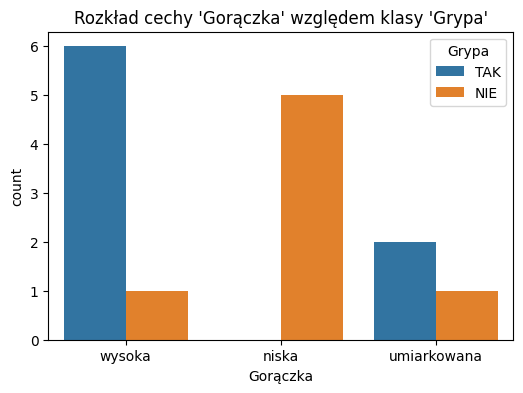

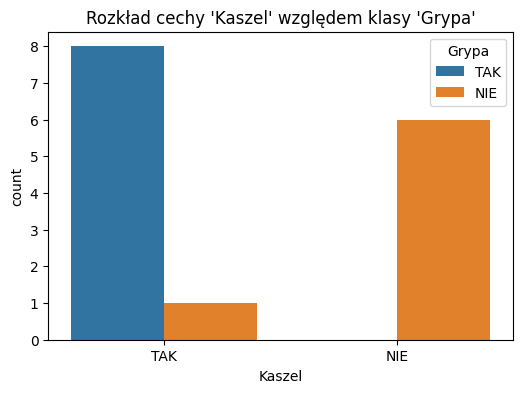

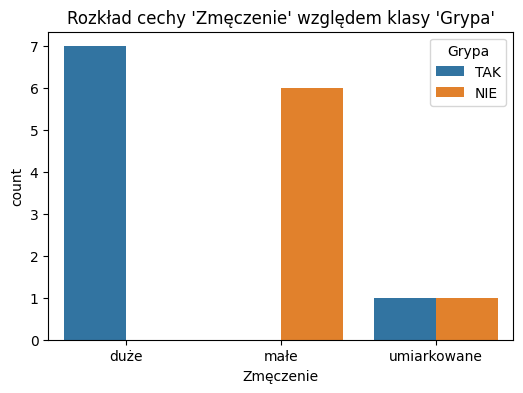

In [17]:
data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df_grypa = pd.DataFrame(data)

print("\nDANE:")
print(df_grypa)


count_grypa = df_grypa['Grypa'][df_grypa['Grypa'] == "TAK"].count()
print(f'\nW danych znajduje się {count_grypa} przypadków grypy')

features = ['Gorączka', 'Kaszel', 'Zmęczenie']

for feature in features:
    print("\nCecha:", feature)
    print(df_grypa.groupby('Grypa')[feature].value_counts(normalize=True))

for feature in features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_grypa, x=feature, hue='Grypa')
    plt.title(f"Rozkład cechy '{feature}' względem klasy 'Grypa'")
    plt.show()